In [94]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline
import seaborn as sns
import platform
from matplotlib import font_manager , rc

if platform.system() == 'Darwin':
  rc('font' , family = 'AppleGothic')
elif platform.system() == 'Windows':
  path = 'C:/Windows/Fonts/malgun.ttf'
  font_name = font_manager.FontProperties(fname = path).get_name()
  rc('font' , family = font_name)
else:
  print('모름')
plt.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings('ignore')

# 데이터 셋 로딩과 주제 정의

In [174]:
data = pd.read_csv('speed_dating.csv')

In [96]:
data = data.iloc[:,2:]

In [97]:
data.columns

Index(['gender', 'age', 'age_o', 'race', 'race_o', 'importance_same_race',
       'importance_same_religion', 'pref_o_attractive', 'pref_o_sincere',
       'pref_o_intelligence', 'pref_o_funny', 'pref_o_ambitious',
       'pref_o_shared_interests', 'attractive_o', 'sincere_o',
       'intelligence_o', 'funny_o', 'ambitous_o', 'shared_interests_o',
       'attractive_important', 'sincere_important', 'intellicence_important',
       'funny_important', 'ambtition_important', 'shared_interests_important',
       'attractive_partner', 'sincere_partner', 'intelligence_partner',
       'funny_partner', 'ambition_partner', 'shared_interests_partner',
       'interests_correlate', 'expected_happy_with_sd_people',
       'expected_num_interested_in_me', 'like', 'guess_prob_liked', 'met',
       'match'],
      dtype='object')

- perf_o_xxx : 상대방이 xxx 항목을 얼마나 중요시하는지에 대한 점수
- xxx_o : 상대방이 본인의 xxx 항목을 평가한 점수
- xxx_important : xxx 항목에 대해 본인이 얼마나 중요하게 생각하는지에 대한 점수
- xxx_partner : 본인이 상대방에 대한 xxx 항목 평가
- interests_correlate : 관심사 연관도
- expectd_happy_with_sd_people : 스피드 데이팅을 통해 만난 사람과 함께 할 때 , 얼마나 좋을지에 대한 기대치
- expected_num_interested_in_me : 얼마나 많은 사람이 나에게 관심을 보일지에 대한 기대치
- like : 파트너를 좋아하는지
- guss_prob_liked : 파트너가 나를 마음에 들어했을지에 대한 예상
- met : 이전에 만난 적이 있는지
- match : target

In [98]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,8283.0,26.358928,3.566763,18.00,24.00,26.00,28.00,55.00
age_o,8274.0,26.364999,3.563648,18.00,24.00,26.00,28.00,55.00
importance_same_race,8299.0,3.784793,2.845708,0.00,1.00,3.00,6.00,10.00
importance_same_religion,8299.0,3.651645,2.805237,1.00,1.00,3.00,6.00,10.00
pref_o_attractive,8289.0,22.495347,12.569802,0.00,15.00,20.00,25.00,100.00
pref_o_sincere,8289.0,17.396867,7.044003,0.00,15.00,18.37,20.00,60.00
pref_o_intelligence,8289.0,20.270759,6.782895,0.00,17.39,20.00,23.81,50.00
pref_o_funny,8280.0,17.459714,6.085526,0.00,15.00,18.00,20.00,50.00
pref_o_ambitious,8271.0,10.685375,6.126544,0.00,5.00,10.00,15.00,53.00
pref_o_shared_interests,8249.0,11.845930,6.362746,0.00,9.52,10.64,16.00,30.00


In [99]:
#결측치 비율 확인
data.isna().mean()

gender                           0.000000
age                              0.011339
age_o                            0.012413
race                             0.007520
race_o                           0.008713
importance_same_race             0.009429
importance_same_religion         0.009429
pref_o_attractive                0.010623
pref_o_sincere                   0.010623
pref_o_intelligence              0.010623
pref_o_funny                     0.011697
pref_o_ambitious                 0.012772
pref_o_shared_interests          0.015397
attractive_o                     0.025304
sincere_o                        0.034256
intelligence_o                   0.036524
funny_o                          0.042970
ambitous_o                       0.086178
shared_interests_o               0.128432
attractive_important             0.009429
sincere_important                0.009429
intellicence_important           0.009429
funny_important                  0.010623
ambtition_important              0

- 종교와 인종 선호도 수치는 비어있을 경우 , 상관없음으로 간주 . 가중치를 곱할 때 1로 표기

In [100]:
data.describe()

,age,age_o,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,...,funny_partner,ambition_partner,shared_interests_partner,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,like,guess_prob_liked,met,match
count,8283.000000,8274.000000,8299.000000,8299.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,...,8028.000000,7666.000000,7311.000000,8220.000000,8277.000000,1800.000000,8138.000000,8069.000000,8003.000000,8378.000000
mean,26.358928,26.364999,3.784793,3.651645,22.495347,17.396867,20.270759,17.459714,10.685375,11.845930,...,6.400598,6.777524,5.474559,0.196010,5.534131,5.570556,6.134087,5.207523,0.049856,0.164717
std,3.566763,3.563648,2.845708,2.805237,12.569802,7.044003,6.782895,6.085526,6.126544,6.362746,...,1.953702,1.794055,2.156363,0.303539,1.734059,4.762569,1.841285,2.129565,0.282168,0.370947
min,18.000000,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-0.830000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,24.000000,1.000000,1.000000,15.000000,15.000000,17.390000,15.000000,5.000000,9.520000,...,5.000000,6.000000,4.000000,-0.020000,5.000000,2.000000,5.000000,4.000000,0.000000,0.000000
50%,26.000000,26.000000,3.000000,3.000000,20.000000,18.370000,20.000000,18.000000,10.000000,10.640000,...,7.000000,7.000000,6.000000,0.210000,6.000000,4.000000,6.000000,5.000000,0.000000,0.000000
75%,28.000000,28.000000,6.000000,6.000000,25.000000,20.000000,23.810000,20.000000,15.000000,16.000000,...,8.000000,8.000000,7.000000,0.430000,7.000000,8.000000,7.000000,7.000000,0.000000,0.000000
max,55.000000,55.000000,10.000000,10.000000,100.000000,60.000000,50.000000,50.000000,53.000000,30.000000,...,10.000000,10.000000,10.000000,0.910000,10.000000,20.000000,10.000000,10.000000,8.000000,1.000000


In [101]:
data['importance_same_race'] = data['importance_same_race'].fillna(1)

In [102]:
data['importance_same_religion'] = data['importance_same_religion'].fillna(1)

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   gender                         8378 non-null   object 
 1   age                            8283 non-null   float64
 2   age_o                          8274 non-null   float64
 3   race                           8315 non-null   object 
 4   race_o                         8305 non-null   object 
 5   importance_same_race           8378 non-null   float64
 6   importance_same_religion       8378 non-null   float64
 7   pref_o_attractive              8289 non-null   float64
 8   pref_o_sincere                 8289 non-null   float64
 9   pref_o_intelligence            8289 non-null   float64
 10  pref_o_funny                   8280 non-null   float64
 11  pref_o_ambitious               8271 non-null   float64
 12  pref_o_shared_interests        8249 non-null   f

- 서로 평가를 해야하는데 , 평가에 기입 안한 것들 제거

In [104]:
data.dropna(subset = ['pref_o_attractive', 'pref_o_sincere', 'pref_o_intelligence',
       'pref_o_funny', 'pref_o_ambitious', 'pref_o_shared_interests',
       'attractive_o', 'sincere_o', 'intelligence_o', 'funny_o', 'ambitous_o',
       'shared_interests_o', 'attractive_important', 'sincere_important',
       'intellicence_important', 'funny_important', 'ambtition_important',
       'shared_interests_important', 'attractive_partner', 'sincere_partner',
       'intelligence_partner', 'funny_partner', 'ambition_partner',
       'shared_interests_partner'] , inplace = True)

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5842 entries, 0 to 8377
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   gender                         5842 non-null   object 
 1   age                            5826 non-null   float64
 2   age_o                          5826 non-null   float64
 3   race                           5842 non-null   object 
 4   race_o                         5842 non-null   object 
 5   importance_same_race           5842 non-null   float64
 6   importance_same_religion       5842 non-null   float64
 7   pref_o_attractive              5842 non-null   float64
 8   pref_o_sincere                 5842 non-null   float64
 9   pref_o_intelligence            5842 non-null   float64
 10  pref_o_funny                   5842 non-null   float64
 11  pref_o_ambitious               5842 non-null   float64
 12  pref_o_shared_interests        5842 non-null   f

- expected_num_interested_in_me와 guess_prob_liked는 상대방이 본인을 어떻게 생각하느냐에 대한 '예상' 이므로 , 제거

In [106]:
data.drop(['guess_prob_liked' , 'expected_num_interested_in_me'] , axis = 1 , inplace = True)

- expected_happy_with_sd_people는 이사람이랑 만나면 행복할 수 있을까? 라는 기대치이다. 이것은 서로의 점수를 통해서 예측할 수 있으므로 제거

In [107]:
data.drop('expected_happy_with_sd_people' , axis = 1 , inplace = True)

- like도 서로의 점수를 통해서 예측할 수 있으므로 제거

In [108]:
data.drop('like' , axis = 1 , inplace = True)

- met 은 만난 적이 있는지에 대한 0 or 1이다. 기입을 안한 건 만나지 않았다는 것으로 간주. 0으로 채우기

In [109]:
data.met = data.met.fillna(0)

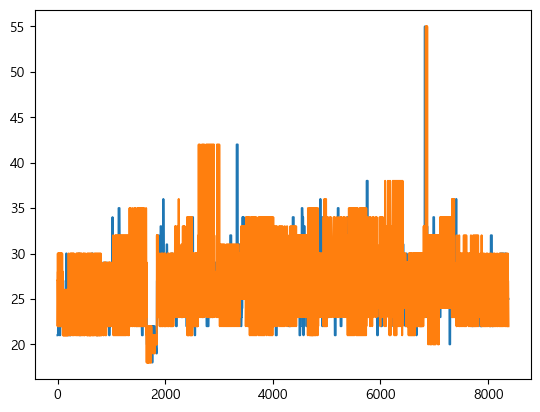

In [110]:
plt.plot(data.age)
plt.plot(data.age_o)

In [111]:
data[data.age.isna()]

,gender,age,age_o,race,race_o,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,...,shared_interests_important,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,interests_correlate,met,match
7476,female,NaN,25.0,European/Caucasian-American,Asian/PacificIslander/Asian-American,1.0,1.0,15.0,30.0,20.0,...,15.0,5.0,8.0,8.0,5.0,8.0,4.0,0.22,0.0,0
7477,female,NaN,26.0,European/Caucasian-American,Asian/PacificIslander/Asian-American,1.0,1.0,25.0,20.0,20.0,...,15.0,5.0,8.0,8.0,5.0,8.0,4.0,-0.24,0.0,0
7479,female,NaN,24.0,European/Caucasian-American,Other,1.0,1.0,30.0,30.0,30.0,...,15.0,6.0,7.0,8.0,5.0,8.0,4.0,0.23,0.0,0
7480,female,NaN,23.0,European/Caucasian-American,European/Caucasian-American,1.0,1.0,23.0,14.0,19.0,...,15.0,5.0,8.0,9.0,5.0,8.0,4.0,0.46,0.0,0
7481,female,NaN,29.0,European/Caucasian-American,European/Caucasian-American,1.0,1.0,30.0,20.0,20.0,...,15.0,5.0,7.0,8.0,4.0,8.0,4.0,0.54,0.0,0
7482,female,NaN,22.0,European/Caucasian-American,Asian/PacificIslander/Asian-American,1.0,1.0,20.0,5.0,25.0,...,15.0,7.0,7.0,8.0,6.0,8.0,6.0,0.54,0.0,0
7484,female,NaN,22.0,European/Caucasian-American,European/Caucasian-American,1.0,1.0,30.0,10.0,20.0,...,15.0,5.0,8.0,8.0,5.0,8.0,3.0,0.08,0.0,0
7486,female,NaN,23.0,European/Caucasian-American,Asian/PacificIslander/Asian-American,1.0,1.0,40.0,30.0,0.0,...,15.0,5.0,9.0,9.0,3.0,9.0,4.0,-0.19,0.0,0
7487,female,NaN,23.0,European/Caucasian-American,Asian/PacificIslander/Asian-American,1.0,1.0,25.0,15.0,20.0,...,15.0,5.0,9.0,9.0,4.0,9.0,3.0,0.30,0.0,0
7488,female,NaN,24.0,European/Caucasian-American,Asian/PacificIslander/Asian-American,1.0,1.0,20.0,16.0,16.0,...,15.0,5.0,8.0,9.0,4.0,9.0,3.0,-0.18,0.0,0


In [112]:
data[data.age_o.isna()]

,gender,age,age_o,race,race_o,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,...,shared_interests_important,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,interests_correlate,met,match
7897,male,25.0,NaN,Asian/PacificIslander/Asian-American,European/Caucasian-American,5.0,1.0,20.0,20.0,20.0,...,5.0,10.0,8.0,5.0,3.0,10.0,1.0,0.22,0.0,0
7919,male,26.0,NaN,Asian/PacificIslander/Asian-American,European/Caucasian-American,8.0,3.0,20.0,20.0,20.0,...,10.0,7.0,7.0,7.0,6.0,5.0,4.0,-0.24,0.0,0
7963,male,24.0,NaN,Other,European/Caucasian-American,1.0,1.0,20.0,20.0,20.0,...,3.0,7.0,7.0,6.0,7.0,8.0,7.0,0.23,0.0,0
7985,male,23.0,NaN,European/Caucasian-American,European/Caucasian-American,5.0,6.0,20.0,20.0,20.0,...,18.0,8.0,8.0,8.0,7.0,8.0,6.0,0.46,0.0,0
8007,male,29.0,NaN,European/Caucasian-American,European/Caucasian-American,1.0,1.0,20.0,20.0,20.0,...,0.0,9.0,5.0,7.0,4.0,6.0,3.0,0.54,0.0,0
8029,male,22.0,NaN,Asian/PacificIslander/Asian-American,European/Caucasian-American,7.0,1.0,20.0,20.0,20.0,...,20.0,9.0,8.0,9.0,8.0,8.0,7.0,0.54,0.0,0
8073,male,22.0,NaN,European/Caucasian-American,European/Caucasian-American,6.0,6.0,20.0,20.0,20.0,...,10.0,8.0,6.0,7.0,7.0,6.0,7.0,0.08,0.0,0
8117,male,23.0,NaN,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,2.0,20.0,20.0,20.0,...,10.0,10.0,10.0,5.0,7.0,6.0,5.0,-0.19,0.0,0
8139,male,23.0,NaN,Asian/PacificIslander/Asian-American,European/Caucasian-American,7.0,1.0,20.0,20.0,20.0,...,10.0,10.0,7.0,6.0,7.0,6.0,2.0,0.30,0.0,0
8161,male,24.0,NaN,Asian/PacificIslander/Asian-American,European/Caucasian-American,9.0,6.0,20.0,20.0,20.0,...,15.0,8.0,8.0,8.0,5.0,8.0,3.0,-0.18,0.0,0


- 나이를 기재하지 않은 32개의 NaN값을 보면 , 16명의 여자가 기재하지 않았다는 것을 알 수 있다. 그런데 인종까지 같다. 한명인가??

- 16개의 NaN값은 여자의 나이의 평균으로 대체하자. 나이의 분포를 보면 55세만 아니면 중요하지 않을 것 같다.

In [113]:
female = data.loc[data['gender'] == 'female' , 'age'].mean()

In [114]:
data.fillna(female , inplace = True)

- pref와 19열부터 나오는 important들은 각각 6개의 컬럼이며 , 그 합은 100이다. 가중치를 둘 때 , 퍼센트로 바꾸고 , 실질적인 점수에 가중치를 곱해보자

In [115]:
data.columns

Index(['gender', 'age', 'age_o', 'race', 'race_o', 'importance_same_race',
       'importance_same_religion', 'pref_o_attractive', 'pref_o_sincere',
       'pref_o_intelligence', 'pref_o_funny', 'pref_o_ambitious',
       'pref_o_shared_interests', 'attractive_o', 'sincere_o',
       'intelligence_o', 'funny_o', 'ambitous_o', 'shared_interests_o',
       'attractive_important', 'sincere_important', 'intellicence_important',
       'funny_important', 'ambtition_important', 'shared_interests_important',
       'attractive_partner', 'sincere_partner', 'intelligence_partner',
       'funny_partner', 'ambition_partner', 'shared_interests_partner',
       'interests_correlate', 'met', 'match'],
      dtype='object')

In [116]:
data[['pref_o_attractive', 'pref_o_sincere',
       'pref_o_intelligence', 'pref_o_funny', 'pref_o_ambitious',
       'pref_o_shared_interests']] = data[['pref_o_attractive', 'pref_o_sincere',
       'pref_o_intelligence', 'pref_o_funny', 'pref_o_ambitious',
       'pref_o_shared_interests']]/100

In [117]:
data[['attractive_important', 'sincere_important', 'intellicence_important',
'funny_important', 'ambtition_important', 'shared_interests_important']] = data[['attractive_important', 'sincere_important', 'intellicence_important',
       'funny_important', 'ambtition_important', 'shared_interests_important']]/100

In [118]:
for i , j in enumerate(['attractive_o', 'sincere_o', 'intellicence_o','funny_o', 'ambtition_o', 'shared_interests_o']):
    data[j] = data[['pref_o_attractive', 'pref_o_sincere',
       'pref_o_intelligence', 'pref_o_funny', 'pref_o_ambitious',
       'pref_o_shared_interests']].iloc[:,i] * data[['attractive_o', 'sincere_o',
       'intelligence_o', 'funny_o', 'ambitous_o', 'shared_interests_o']].iloc[:,i]

In [119]:
for i,j in enumerate(['attractive', 'sincere', 'intellicence','funny', 'ambtition', 'shared_interests']):
    data[j] = data[['attractive_important', 'sincere_important', 'intellicence_important',
'funny_important', 'ambtition_important', 'shared_interests_important']].iloc[:,i] * data[['attractive_partner', 'sincere_partner', 'intelligence_partner',
       'funny_partner', 'ambition_partner', 'shared_interests_partner']].iloc[:,i]

In [120]:
data.drop(['attractive_important', 'sincere_important', 'intellicence_important',
'funny_important', 'ambtition_important', 'shared_interests_important','pref_o_attractive', 'pref_o_sincere',
       'pref_o_intelligence', 'pref_o_funny', 'pref_o_ambitious',
       'pref_o_shared_interests'] , axis = 1 , inplace = True)

In [121]:
data.head()

,gender,age,age_o,race,race_o,importance_same_race,importance_same_religion,attractive_o,sincere_o,intelligence_o,...,met,match,intellicence_o,ambtition_o,attractive,sincere,intellicence,funny,ambtition,shared_interests
0,female,21.0,27.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,2.1,1.6,8.0,...,0.0,0,1.60,0.00,0.90,1.8,1.4,1.05,0.90,0.75
1,female,21.0,22.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,4.2,0.0,10.0,...,1.0,0,0.00,0.00,1.05,1.6,1.4,1.20,0.75,0.90
2,female,21.0,22.0,Asian/PacificIslander/Asian-American,Asian/PacificIslander/Asian-American,2.0,4.0,1.9,1.8,10.0,...,1.0,1,1.90,1.40,0.75,1.6,1.8,1.20,0.75,1.05
3,female,21.0,23.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,2.1,0.4,9.0,...,0.0,1,1.35,0.45,1.05,1.2,1.6,1.05,0.90,1.20
4,female,21.0,24.0,Asian/PacificIslander/Asian-American,Latino/HispanicAmerican,2.0,4.0,2.4,0.7,9.0,...,0.0,1,1.80,0.90,0.75,1.2,1.4,1.05,0.90,0.90


In [122]:
data.columns

Index(['gender', 'age', 'age_o', 'race', 'race_o', 'importance_same_race',
       'importance_same_religion', 'attractive_o', 'sincere_o',
       'intelligence_o', 'funny_o', 'ambitous_o', 'shared_interests_o',
       'attractive_partner', 'sincere_partner', 'intelligence_partner',
       'funny_partner', 'ambition_partner', 'shared_interests_partner',
       'interests_correlate', 'met', 'match', 'intellicence_o', 'ambtition_o',
       'attractive', 'sincere', 'intellicence', 'funny', 'ambtition',
       'shared_interests'],
      dtype='object')

In [123]:
data.drop(['attractive_o', 'sincere_o',
       'intelligence_o', 'funny_o', 'ambitous_o', 'shared_interests_o',
       'attractive_partner', 'sincere_partner', 'intelligence_partner',
       'funny_partner', 'ambition_partner', 'shared_interests_partner'] , axis = 1 , inplace = True)

In [124]:
data.columns

Index(['gender', 'age', 'age_o', 'race', 'race_o', 'importance_same_race',
       'importance_same_religion', 'interests_correlate', 'met', 'match',
       'intellicence_o', 'ambtition_o', 'attractive', 'sincere',
       'intellicence', 'funny', 'ambtition', 'shared_interests'],
      dtype='object')

In [125]:
data = data[['gender', 'age', 'age_o', 'race', 'race_o', 'importance_same_race',
       'importance_same_religion', 'interests_correlate', 'met',
       'intellicence_o', 'ambtition_o', 'attractive', 'sincere',
       'intellicence', 'funny', 'ambtition', 'shared_interests','match']]

- age의 결측치 처리 과정 중 , 남녀 두 경우에 대한 매치가 중복되므로 , gender는 분석에 필요가 없다고 판단. 제거

In [126]:
data.drop('gender' , axis = 1 , inplace = True)

- 인종에 대한 수치는 importance_same_race에서 다루므로 , 인종도 제거

In [127]:
data.drop(['race','race_o'] , axis = 1 , inplace = True)

In [128]:
data.interests_correlate

0       0.14
1       0.54
2       0.16
3       0.61
4       0.21
        ... 
8367    0.37
8368    0.27
8369    0.45
8370    0.35
8377    0.01
Name: interests_correlate, Length: 5842, dtype: float64

In [129]:
data.head()

,age,age_o,importance_same_race,importance_same_religion,interests_correlate,met,intellicence_o,ambtition_o,attractive,sincere,intellicence,funny,ambtition,shared_interests,match
0,21.0,27.0,2.0,4.0,0.14,0.0,1.60,0.00,0.90,1.8,1.4,1.05,0.90,0.75,0
1,21.0,22.0,2.0,4.0,0.54,1.0,0.00,0.00,1.05,1.6,1.4,1.20,0.75,0.90,0
2,21.0,22.0,2.0,4.0,0.16,1.0,1.90,1.40,0.75,1.6,1.8,1.20,0.75,1.05,1
3,21.0,23.0,2.0,4.0,0.61,0.0,1.35,0.45,1.05,1.2,1.6,1.05,0.90,1.20,1
4,21.0,24.0,2.0,4.0,0.21,0.0,1.80,0.90,0.75,1.2,1.4,1.05,0.90,0.90,1


In [130]:
data.columns

Index(['age', 'age_o', 'importance_same_race', 'importance_same_religion',
       'interests_correlate', 'met', 'intellicence_o', 'ambtition_o',
       'attractive', 'sincere', 'intellicence', 'funny', 'ambtition',
       'shared_interests', 'match'],
      dtype='object')

In [131]:
hap = data['importance_same_race'] + data['importance_same_religion']

In [156]:
data.drop('met' , axis = 1 , inplace = True)

In [157]:
data1 = data.iloc[:,:-1].to_numpy()
target = data.iloc[:,-1].to_numpy()

In [158]:
data.match.value_counts()

0    4802
1    1040
Name: match, dtype: int64

In [159]:
from sklearn.model_selection import train_test_split

train_input , test_input , train_target , test_target = train_test_split(data1 , target , test_size = 0.2 , stratify = target)

In [160]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , roc_auc_score , f1_score , confusion_matrix , roc_curve , precision_recall_curve

In [161]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators = 400)
xgb.fit(train_input , train_target)

xgb_pred = xgb.predict(test_input)

accuracy_score(test_target , xgb_pred)

0.8186484174508126

In [162]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators' : [200,300,600,700],
         'learning_rate' : [0.2,0.3,0.01],
         'max_depth' : [4,5,6]}

In [163]:
gs = GridSearchCV(XGBClassifier(random_state = 42) , params , n_jobs = -1)
gs.fit(train_input , train_target)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.2, 0.3, 0.01],
                         'max_depth': [4, 5, 6],
                         'n_estimators': [200, 300, 600, 700]})

In [164]:
gs.best_params_

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 700}

In [165]:
xgb2 = XGBClassifier(n_estimators = 700 , learning_rate = 0.01 , max_depth = 5 , random_state = 42)
xgb2.fit(train_input , train_target)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=700, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [166]:
accuracy_score(test_target , xgb2.predict(test_input)), precision_score(test_target , xgb2.predict(test_input))

(0.8280581693755347, 0.5614035087719298)

In [167]:
confusion_matrix(test_target , xgb2.predict(test_input))

array([[936,  25],
       [176,  32]], dtype=int64)

- 실제값은 만났는데 , 만나지 않았다고 예측한 수가 너무 많다.

In [168]:
xgb2.feature_importances_

array([0.06641743, 0.05663541, 0.07008164, 0.05593743, 0.05599317,
       0.07372862, 0.06895018, 0.08205933, 0.06552846, 0.07783935,
       0.16230273, 0.07966997, 0.0848562 ], dtype=float32)

In [153]:
len(data.columns)

15

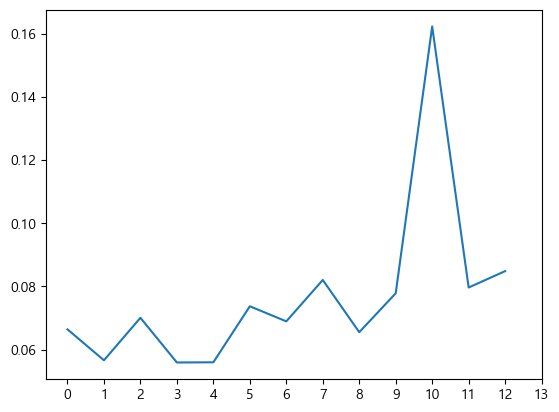

In [169]:
plt.plot(xgb2.feature_importances_)
plt.xticks(np.arange(14) , np.arange(0,14,1))
plt.show()

In [170]:
data.columns.tolist()[10]

'funny'

- 이 모델에서 가장 중요한 것은 상대방이 얼마나 재밌는지에 대한 점수가 가장 중요했다고 볼 수 있다.
- 그런데 점수가 너무 낮다..

In [171]:
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss = 'log_loss' , max_iter = 10 , random_state = 42)
sc.fit(train_input , train_target)
print(sc.score(train_input , train_target))
print(sc.score(test_input , test_target))

0.8219559169698266
0.8220701454234388


In [172]:
print(xgb2.score(train_input , train_target))
print(xgb2.score(test_input , test_target))

0.8722448106141665
0.8280581693755347


In [182]:
data1 = pd.read_csv('speed_dating.csv')

In [183]:
data1 = data1.iloc[:,2:]

In [184]:
data1

,gender,age,age_o,race,race_o,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,...,funny_partner,ambition_partner,shared_interests_partner,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,like,guess_prob_liked,met,match
0,female,21.0,27.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,35.0,20.0,20.0,...,7.0,6.0,5.0,0.14,3.0,2.0,7.0,6.0,0.0,0
1,female,21.0,22.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,60.0,0.0,0.0,...,8.0,5.0,6.0,0.54,3.0,2.0,7.0,5.0,1.0,0
2,female,21.0,22.0,Asian/PacificIslander/Asian-American,Asian/PacificIslander/Asian-American,2.0,4.0,19.0,18.0,19.0,...,8.0,5.0,7.0,0.16,3.0,2.0,7.0,NaN,1.0,1
3,female,21.0,23.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,30.0,5.0,15.0,...,7.0,6.0,8.0,0.61,3.0,2.0,7.0,6.0,0.0,1
4,female,21.0,24.0,Asian/PacificIslander/Asian-American,Latino/HispanicAmerican,2.0,4.0,30.0,10.0,20.0,...,7.0,6.0,6.0,0.21,3.0,2.0,6.0,6.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,male,25.0,26.0,European/Caucasian-American,Latino/HispanicAmerican,1.0,1.0,10.0,10.0,30.0,...,5.0,NaN,NaN,0.64,10.0,NaN,2.0,5.0,0.0,0
8374,male,25.0,24.0,European/Caucasian-American,Other,1.0,1.0,50.0,20.0,10.0,...,4.0,4.0,NaN,0.71,10.0,NaN,4.0,4.0,0.0,0
8375,male,25.0,29.0,European/Caucasian-American,Latino/HispanicAmerican,1.0,1.0,40.0,10.0,30.0,...,8.0,8.0,NaN,-0.46,10.0,NaN,6.0,5.0,0.0,0
8376,male,25.0,22.0,European/Caucasian-American,Asian/PacificIslander/Asian-American,1.0,1.0,10.0,25.0,25.0,...,4.0,NaN,5.0,0.62,10.0,NaN,5.0,5.0,0.0,0


In [185]:
data1.columns

Index(['gender', 'age', 'age_o', 'race', 'race_o', 'importance_same_race',
       'importance_same_religion', 'pref_o_attractive', 'pref_o_sincere',
       'pref_o_intelligence', 'pref_o_funny', 'pref_o_ambitious',
       'pref_o_shared_interests', 'attractive_o', 'sincere_o',
       'intelligence_o', 'funny_o', 'ambitous_o', 'shared_interests_o',
       'attractive_important', 'sincere_important', 'intellicence_important',
       'funny_important', 'ambtition_important', 'shared_interests_important',
       'attractive_partner', 'sincere_partner', 'intelligence_partner',
       'funny_partner', 'ambition_partner', 'shared_interests_partner',
       'interests_correlate', 'expected_happy_with_sd_people',
       'expected_num_interested_in_me', 'like', 'guess_prob_liked', 'met',
       'match'],
      dtype='object')

In [186]:
data1 = data1.dropna(subset = ['pref_o_attractive', 'pref_o_sincere',
       'pref_o_intelligence', 'pref_o_funny', 'pref_o_ambitious',
       'pref_o_shared_interests','attractive_important', 'sincere_important', 'intellicence_important',
       'funny_important', 'ambtition_important', 'shared_interests_important'])

In [190]:
data1 = data1.fillna(-99)

In [192]:
def age_gap(x):
    if x['age'] == -99:
        return -99
    elif x['age_o'] == -99:
        return -99
    elif x['gender'] == 'female':
        return x['age_o'] - x['age']
    else:
        return x['age'] - x['age_o']

In [193]:
data1['age_gap'] = data1.apply(age_gap , axis = 1)
data1['age_gap_abs'] = abs(data1['age_gap'])

In [194]:
def same_race(x):
    if x['race'] == -99:
        return -99
    elif x['race_o'] == -99:
        return -99
    elif x['race'] == x['race_o']:
        return 1
    else:
        return -1

In [195]:
data1['same_race'] = data1.apply(same_race , axis = 1)

In [196]:
def same_race_point(x):
    if x['same_race'] == -99:
        return -99
    else:
        return x['same_race'] * x['importance_same_race']

In [197]:
data1['same_race_point'] = data1.apply(same_race_point , axis = 1)

In [206]:
def rating(data1 , importance , score):
    if data1[importance] == -99:
        return -99
    elif data1[score] == -99:
        return -99
    else:
        return data1[importance] * data1[score]

In [199]:
data1.columns

Index(['gender', 'age', 'age_o', 'race', 'race_o', 'importance_same_race',
       'importance_same_religion', 'pref_o_attractive', 'pref_o_sincere',
       'pref_o_intelligence', 'pref_o_funny', 'pref_o_ambitious',
       'pref_o_shared_interests', 'attractive_o', 'sincere_o',
       'intelligence_o', 'funny_o', 'ambitous_o', 'shared_interests_o',
       'attractive_important', 'sincere_important', 'intellicence_important',
       'funny_important', 'ambtition_important', 'shared_interests_important',
       'attractive_partner', 'sincere_partner', 'intelligence_partner',
       'funny_partner', 'ambition_partner', 'shared_interests_partner',
       'interests_correlate', 'expected_happy_with_sd_people',
       'expected_num_interested_in_me', 'like', 'guess_prob_liked', 'met',
       'match', 'age_gap', 'age_gap_abs', 'same_race', 'same_race_point'],
      dtype='object')

In [202]:
partner_imp = data1.columns[7:13]
partner_rate_me = data1.columns[13:19]
my_imp = data1.columns[19:25]
my_rate = data1.columns[25:31]

 'attractive_p', 'sincere_p', 'intellicence_p',
       'funny_p', 'ambtition_p', 'shared_interests_p'

In [203]:
new_label_partner = ['attractive_p', 'sincere_p', 'intellicence_p', 'funny_p', 'ambtition_p', 'shared_interests_p']
new_label_me = ['attractive_m', 'sincere_m', 'intellicence_m', 'funny_m', 'ambtition_m', 'shared_interests_m']

In [207]:
for i , j , k in zip(new_label_partner , partner_imp , partner_rate_me):
    data1[i] = data1.apply(lambda x : rating(x,j,k) , axis = 1)

In [208]:
for i , j , k in zip(new_label_me , my_imp , my_rate):
    data1[i] = data1.apply(lambda x : rating(x,j,k) , axis = 1)

In [209]:
data1 = pd.get_dummies(data1 , columns = ['gender','race','race_o'] , drop_first = True)

In [210]:
data1

,age,age_o,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,...,shared_interests_m,gender_male,race_Black/AfricanAmerican,race_European/Caucasian-American,race_Latino/HispanicAmerican,race_Other,race_o_Black/AfricanAmerican,race_o_European/Caucasian-American,race_o_Latino/HispanicAmerican,race_o_Other
0,21.0,27.0,2.0,4.0,35.0,20.0,20.0,20.0,0.0,5.0,...,75.0,0,0,0,0,0,0,1,0,0
1,21.0,22.0,2.0,4.0,60.0,0.0,0.0,40.0,0.0,0.0,...,90.0,0,0,0,0,0,0,1,0,0
2,21.0,22.0,2.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,...,105.0,0,0,0,0,0,0,0,0,0
3,21.0,23.0,2.0,4.0,30.0,5.0,15.0,40.0,5.0,5.0,...,120.0,0,0,0,0,0,0,1,0,0
4,21.0,24.0,2.0,4.0,30.0,10.0,20.0,10.0,10.0,20.0,...,90.0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8372,25.0,24.0,1.0,1.0,10.0,15.0,30.0,20.0,15.0,10.0,...,-99.0,1,0,1,0,0,0,1,0,0
8373,25.0,26.0,1.0,1.0,10.0,10.0,30.0,20.0,10.0,15.0,...,-99.0,1,0,1,0,0,0,0,1,0
8374,25.0,24.0,1.0,1.0,50.0,20.0,10.0,5.0,10.0,5.0,...,-99.0,1,0,1,0,0,0,0,0,1
8376,25.0,22.0,1.0,1.0,10.0,25.0,25.0,10.0,10.0,20.0,...,0.0,1,0,1,0,0,0,0,0,0


In [213]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(data1.drop('match' , axis = 1) , data1['match'] , test_size = 0.2 , random_state = 100)

In [214]:
import xgboost as xgb

In [215]:
model = xgb.XGBClassifier(n_estimators = 500 , max_depth = 5 , random_state = 100)
model.fit(x_train , y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=100, ...)

In [216]:
print(model.score(x_train , y_train))
print(model.score(x_test , y_test))

1.0
0.8677736777367774


In [217]:
pred = model.predict(x_test)

In [218]:
accuracy_score(y_test , pred)

0.8677736777367774

In [219]:
confusion_matrix(y_test , pred)

array([[1296,   69],
       [ 146,  115]], dtype=int64)

In [220]:
confusion_matrix(test_target , xgb2.predict(test_input))

array([[936,  25],
       [176,  32]], dtype=int64)

In [221]:
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

In [223]:
print(classification_report(y_test , pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1365
           1       0.62      0.44      0.52       261

    accuracy                           0.87      1626
   macro avg       0.76      0.70      0.72      1626
weighted avg       0.85      0.87      0.86      1626

